## Work Flow

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the
provided data for this analysis.
   
2. Build a predictive model to help determine the probability that a rider will
be retained.

3. Evaluate the model.  Focus on metrics that are important for your *statistical
model*.
 
4. Identify / interpret features that are the most influential in affecting
your predictions.

5. Discuss the validity of your model. Issues such as
leakage.  For more on leakage, see [this essay on
Kaggle](https://www.kaggle.com/dansbecker/data-leakage), and this paper: [Leakage in Data
Mining: Formulation, Detection, and Avoidance](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.365.7769&rep=rep1&type=pdf).

6. Repeat 2 - 5 until you have a satisfactory model.

7. Consider business decisions that your model may indicate are appropriate.
Evaluate possible decisions with metrics that are appropriate for *decision
rules*.

## Deliverables

- Code you used to build the model.  The more repeatable, self explanatory, the
  better.

- A presentation including the following points:
  - How did you compute the target?
  - What model did you use in the end? Why?
  - Alternative models you considered? Why are they not good enough?
  - What performance metric did you use to evaluate the *model*? Why?
  - **Based on insights from the model, what plans do you propose to
    reduce churn?**
  - What are the potential impacts of implementing these plans or decisions?
    What performance metrics did you use to evaluate these *decisions*, why?

## Problem Description

A ride-sharing company (Company X) is interested in predicting rider retention.
To help explore this question, we have provided a sample dataset of a cohort of
users who signed up for an account in January 2014. The data was pulled on July
1, 2014; we consider a user retained if they were “active” (i.e. took a trip)
in the preceding 30 days (from the day the data was pulled). In other words, a
user is "active" if they have taken a trip since June 1, 2014. The data,
`churn.csv`, is in the [data](data) folder.  The data are split into train and
test sets.  You are encouraged to tune and estimate your model's performance on
the train set, then see how it does on the unseen data in the test set at the
end.

- The 'Feature Importance' discussion is in Random Forests lecture
- Also discussed on page 262 of hands-on

### Numerical Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from churn_eda import clean_data

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use("ggplot")

### Learning Libraries

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression

### Load in Data

In [3]:
df = pd.read_csv('data/churn_train.csv')

train = pd.read_csv('data/churn_train.csv')

In [4]:
df = clean_data(df)

train = clean_data(train)

In [5]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn,avg_rating_of_driver_nan,avg_rating_by_driver_nan,days_since_signup
0,6.94,5.0,5.000000,1.00,Astapor,Android,0.0,0,False,100.0,1,0,0,170
1,8.06,5.0,5.000000,1.00,Astapor,Android,0.0,2,True,0.0,1,0,0,157
2,21.50,4.0,4.601697,1.00,Winterfell,iPhone,0.0,1,True,100.0,1,1,0,180
3,9.46,5.0,4.601697,2.75,Winterfell,Android,100.0,1,False,100.0,1,1,0,173
4,13.77,5.0,4.601697,1.00,Winterfell,iPhone,0.0,0,False,100.0,1,1,0,151


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   avg_dist                  40000 non-null  float64
 1   avg_rating_by_driver      40000 non-null  float64
 2   avg_rating_of_driver      40000 non-null  float64
 3   avg_surge                 40000 non-null  float64
 4   city                      40000 non-null  object 
 5   phone                     40000 non-null  object 
 6   surge_pct                 40000 non-null  float64
 7   trips_in_first_30_days    40000 non-null  int64  
 8   luxury_car_user           40000 non-null  bool   
 9   weekday_pct               40000 non-null  float64
 10  churn                     40000 non-null  int64  
 11  avg_rating_of_driver_nan  40000 non-null  int64  
 12  avg_rating_by_driver_nan  40000 non-null  int64  
 13  days_since_signup         40000 non-null  int64  
dtypes: boo

In [7]:
df['avg_rating_of_driver_nan'].value_counts()

0    33472
1     6528
Name: avg_rating_of_driver_nan, dtype: int64

## One Hot Encode Categorical

In [8]:
from onehotencoding import set_ohe

In [9]:
df = set_ohe(df, 'city')
df = set_ohe(df, 'phone')

In [10]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn,avg_rating_of_driver_nan,avg_rating_by_driver_nan,days_since_signup,city: Winterfell,city: Astapor,phone: iPhone,phone: Android
0,6.94,5.0,5.000000,1.00,0.0,0,False,100.0,1,0,0,170,0.0,1.0,0.0,1.0
1,8.06,5.0,5.000000,1.00,0.0,2,True,0.0,1,0,0,157,0.0,1.0,0.0,1.0
2,21.50,4.0,4.601697,1.00,0.0,1,True,100.0,1,1,0,180,1.0,0.0,1.0,0.0
3,9.46,5.0,4.601697,2.75,100.0,1,False,100.0,1,1,0,173,1.0,0.0,0.0,1.0
4,13.77,5.0,4.601697,1.00,0.0,0,False,100.0,1,1,0,151,1.0,0.0,1.0,0.0


# EDA Plots

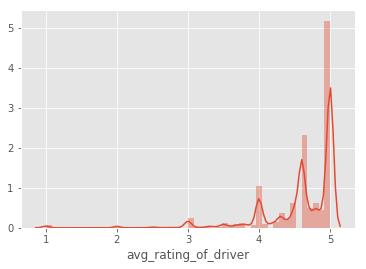

In [11]:
sns.distplot(df['avg_rating_of_driver'])

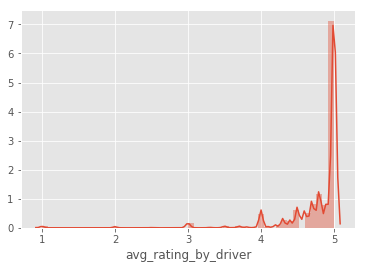

In [12]:
sns.distplot(df['avg_rating_by_driver'])

In [13]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,churn,avg_rating_of_driver_nan,avg_rating_by_driver_nan,days_since_signup,city: Winterfell,city: Astapor,phone: iPhone,phone: Android
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,5.791302,4.777434,4.601697,1.074956,8.857342,2.280700,60.874382,0.624200,0.163200,0.004050,165.460500,0.465500,0.330900,0.690700,0.301325
std,5.708056,0.447180,0.562407,0.222427,20.014008,3.811289,37.089619,0.484335,0.369553,0.063511,8.749512,0.498815,0.470543,0.462211,0.458839
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,151.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000,0.000000,0.000000,0.000000,158.000000,0.000000,0.000000,0.000000,0.000000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,66.700000,1.000000,0.000000,0.000000,165.000000,0.000000,0.000000,1.000000,0.000000
75%,6.930000,5.000000,5.000000,1.050000,8.300000,3.000000,100.000000,1.000000,0.000000,0.000000,173.000000,1.000000,1.000000,1.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.000000,1.000000,1.000000,181.000000,1.000000,1.000000,1.000000,1.000000


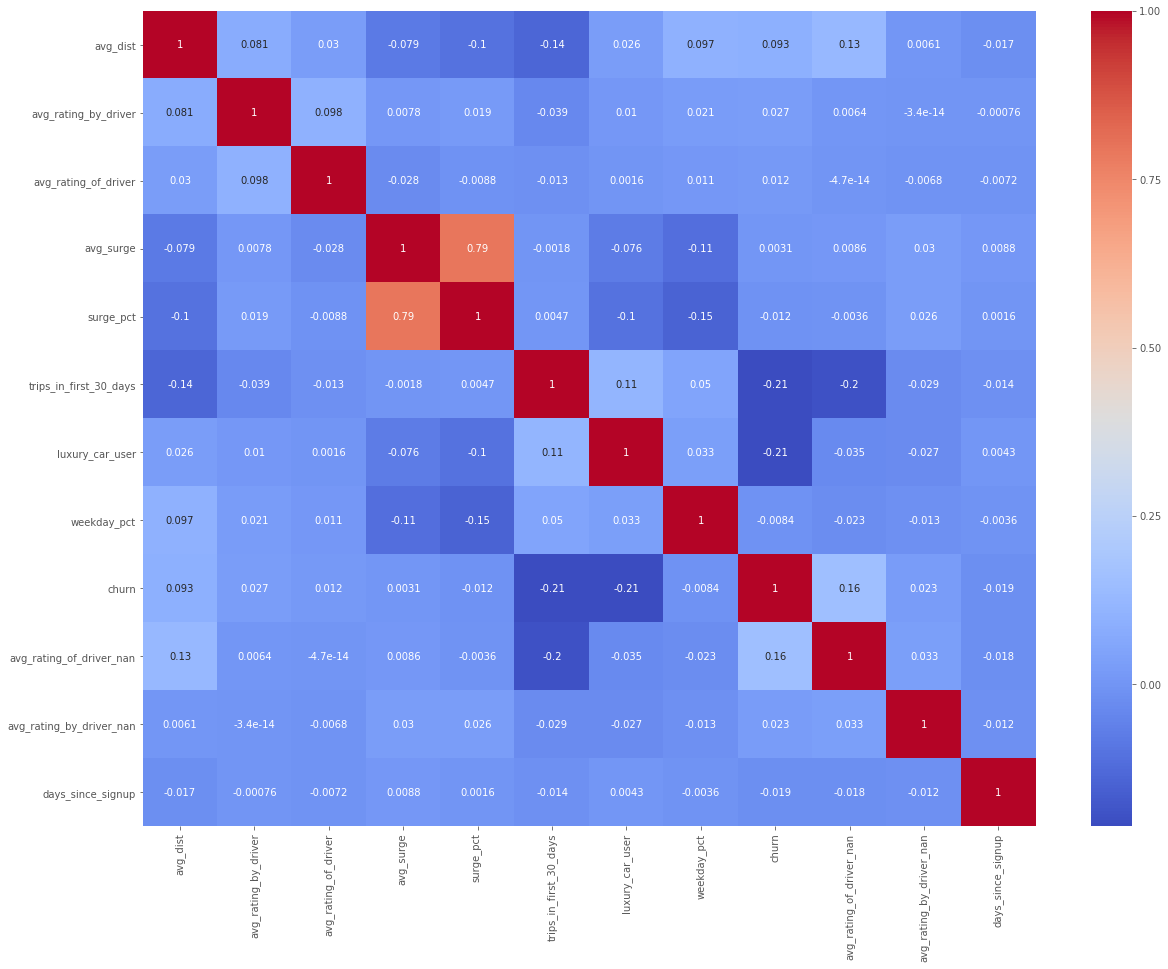

In [14]:
fig ,ax = plt.subplots(figsize=(20,15))

ax = sns.heatmap(train.corr(), annot=True, cmap='coolwarm');

In [15]:
from pandas.plotting import scatter_matrix

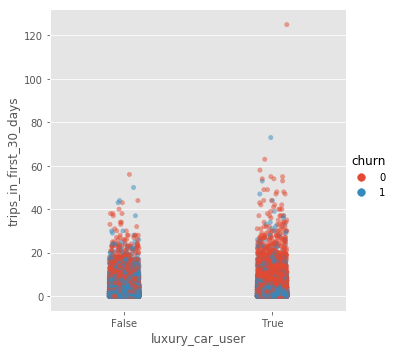

In [16]:
sns.catplot(x='luxury_car_user', y='trips_in_first_30_days', hue='churn', data=train, alpha=0.5)

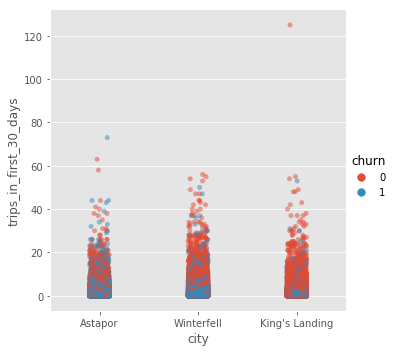

In [17]:
sns.catplot(x='city', y='trips_in_first_30_days', hue='churn', data=train, alpha=0.5)

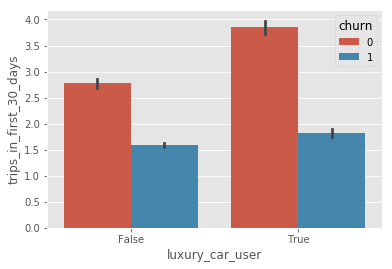

In [34]:
sns.barplot(x='luxury_car_user', y='trips_in_first_30_days', hue='churn', data=train)


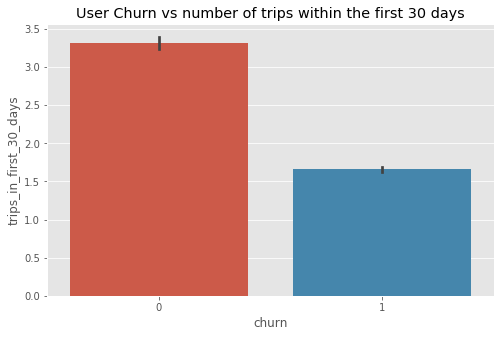

In [31]:
# churn users have a lower amount of trips within the first 30 days
fig, ax = plt.subplots(figsize=(8,5))

ax = sns.barplot(x='churn', y='trips_in_first_30_days', data=train);
ax.set_title('User Churn vs number of trips within the first 30 days')

plt.savefig('images/trips_churn.png')

In [20]:
train.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,churn,avg_rating_of_driver_nan,avg_rating_by_driver_nan,days_since_signup
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,5.791302,4.777434,4.601697,1.074956,8.857342,2.280700,60.874382,0.624200,0.163200,0.004050,165.460500
std,5.708056,0.447180,0.562407,0.222427,20.014008,3.811289,37.089619,0.484335,0.369553,0.063511,8.749512
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,151.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000,0.000000,0.000000,0.000000,158.000000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,66.700000,1.000000,0.000000,0.000000,165.000000
75%,6.930000,5.000000,5.000000,1.050000,8.300000,3.000000,100.000000,1.000000,0.000000,0.000000,173.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.000000,1.000000,1.000000,181.000000


In [21]:
# fig, axes = plt.subplots(10, 1, figsize=(10,5))

# for i, col in enumerate(train.columns):
#     if (train[col].dtype != object) | (train[col].dtype != bool):
#         axes[i] = sns.distplot(train[col])
#         plt.show()

In [22]:
df[['surge_pct', 'avg_surge']].corr()

,surge_pct,avg_surge
surge_pct,1.000000,0.793842
avg_surge,0.793842,1.000000


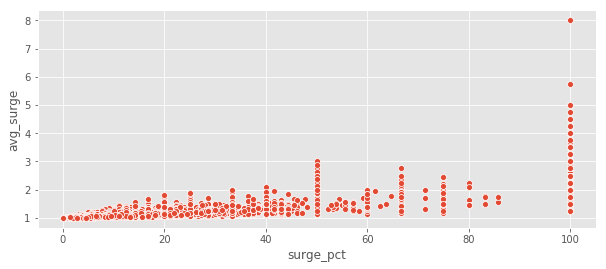

In [23]:
fig, ax = plt.subplots(figsize=(10,4))

ax = sns.scatterplot('surge_pct','avg_surge', data=train);

In [24]:
numerical = train[train.columns[(train.dtypes == float) | (train.dtypes == int)]]

In [25]:
cat = train[train.columns[(train.dtypes == object)]]
cat['churn'] = train['churn'].copy()

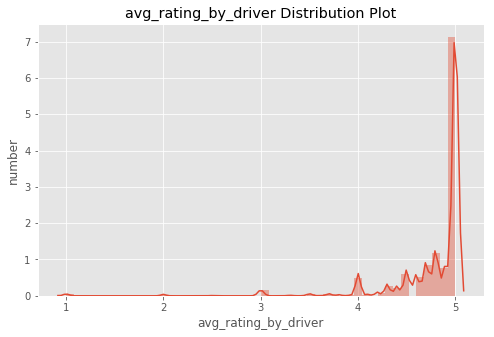

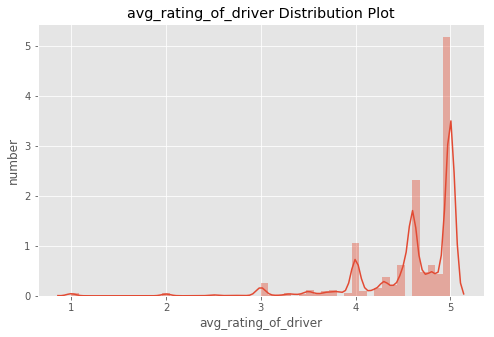

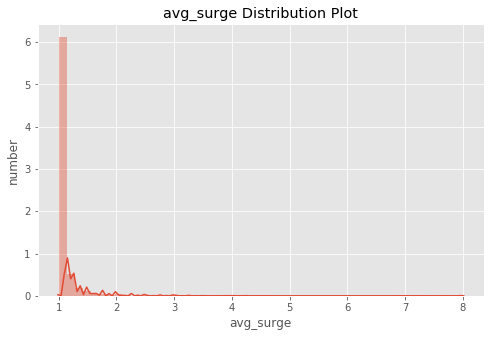

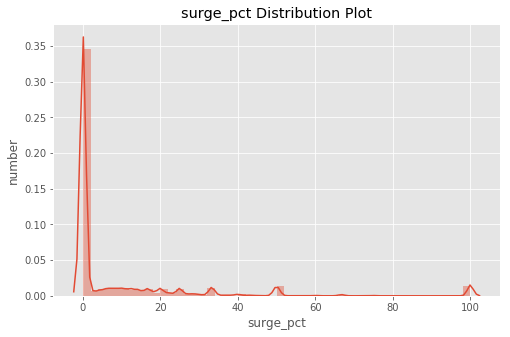

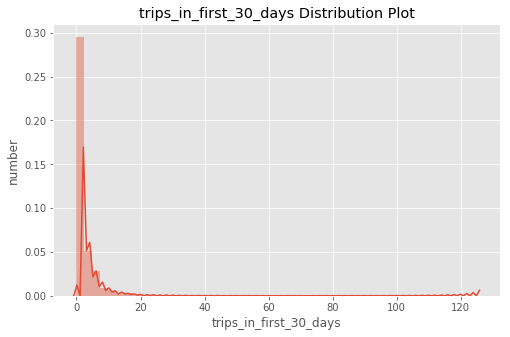

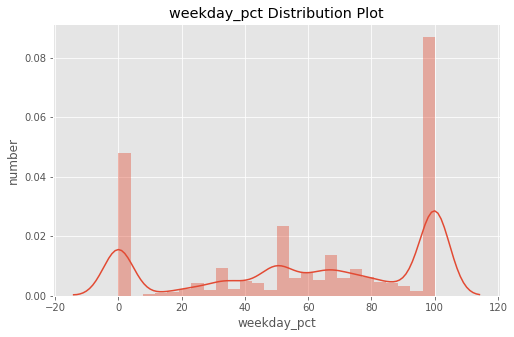

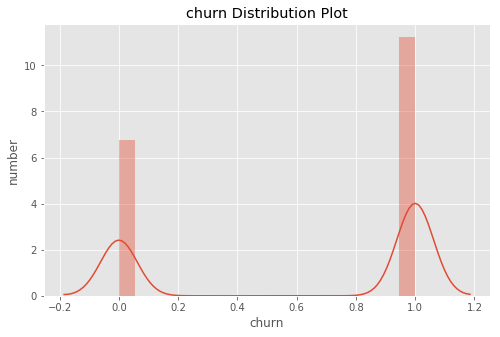

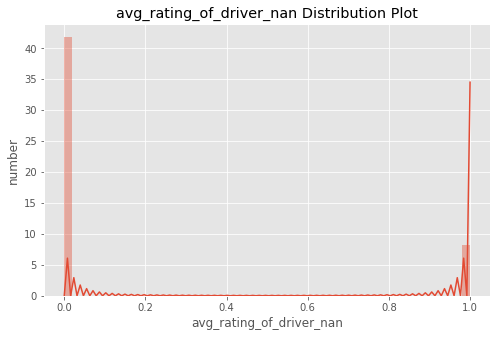

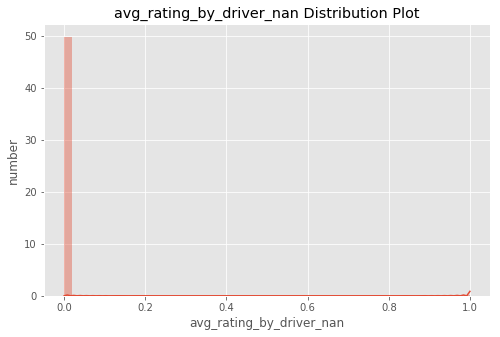

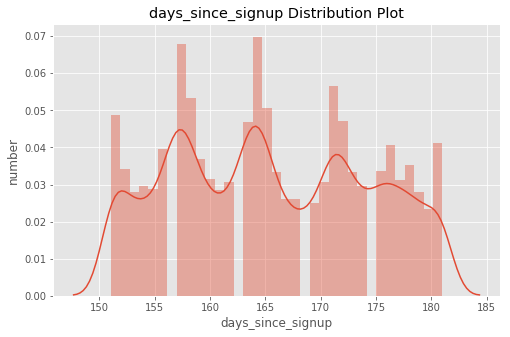

In [32]:
for col in numerical.columns[1:]:
    fig, ax = plt.subplots(figsize=(8,5))
    ax = sns.distplot(numerical[col])
    ax.set_title(f'{col} Distribution Plot')
    ax.set_ylabel('number')
    plt.savefig(f'images/{col}_distplot.png')